Packages Required

In [ ]:
#intsalling profiling
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 68.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=85464ae22a95236efa8f524895554b2fe4cd89fca6568a26e1da777b4bfa46ef
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
#Loading dataset
import pandas as pd
import numpy as np
#Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#(Exploratory Data Analysis)EDA
from collections import Counter
import pandas_profiling as pp
#Data preprocessing
from sklearn.preprocessing import StandardScaler
#Data splitting
from sklearn.model_selection import train_test_split
#Data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
#Ensembling
from mlxtend.classifier import StackingCVClassifier

<ipython-input-2-47baa5d60a0f>:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [ ]:
#Loading the csv data to a Pandas DataFrame and Printing first 5 rows of dataset
data = pd.read_csv('/content/data.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Getting some info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#Number of rows and columns in the dataset
data.shape

(303, 14)

In [ ]:
#Checking for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#Checking the distribution of Trageeted Variable
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

EDA

In [ ]:
#Statistics and Visualizations of DataFrame
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Model Prepration

In [ ]:
#Splitting data into training and testing sets
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [ ]:
#Printing the unique values in y_test and counting the occurrences of each unique value in y_train.
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({1: 131, 0: 111})

In [ ]:
#Applying feature scaling where mean is 0 and standard deviation is 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Navie Bayes

In [ ]:
#Training Naive Bayes model, specifically a Gaussian Naive Bayes model, and evaluating its performance on the test data
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
#Printing the confusion matrix, accuracy, and classification report of Navie Bayes model
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[21  6]
 [ 3 31]]


Accuracy of Naive Bayes model: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



Logistic Regression

In [ ]:
#Training Logistic Regression model on training data and  evaluating its performance on the test data
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
#Printing the confusion matrix, accuracy, and classification report of Logistic Regression model
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[21  6]
 [ 3 31]]


Accuracy of Logistic Regression: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



Random Forest Classfier

In [ ]:
#Training Random Forest Classifier model and evaluating its performance on the test data
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
#Printing the confusion matrix, accuracy, and classification report of Random Forest Classfier model
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[22  5]
 [ 3 31]]


Accuracy of Random Forest: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



Hyperparameter Tuning

In [ ]:
# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=12)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters for Random Forest:", best_params)

Best Hyperparameters for Random Forest: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Oprimized Random Forest

In [ ]:
# Use the best hyperparameters to create the optimized Random Forest model
best_rf = RandomForestClassifier(random_state=12, **best_params)

# Train the optimized model on the training data
best_rf.fit(X_train, y_train)

# Evaluate the optimized model on the test data
best_rf_predicted = best_rf.predict(X_test)
best_rf_conf_matrix = confusion_matrix(y_test, best_rf_predicted)
best_rf_acc_score = accuracy_score(y_test, best_rf_predicted)

# Print the confusion matrix, accuracy, and classification report of the optimized Random Forest model
print("Confusion Matrix for Optimized Random Forest:")
print(best_rf_conf_matrix)
print("\n")
print("Accuracy of Optimized Random Forest:", best_rf_acc_score * 100, '\n')
print(classification_report(y_test, best_rf_predicted))

Confusion Matrix for Optimized Random Forest:
[[22  5]
 [ 3 31]]


Accuracy of Optimized Random Forest: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



Extreme Gradient Boost

In [ ]:
#Trainig Extreme Gradient Boosting (XGBoost) Classifier model and evaluating its performance on the test data.
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
#Printing the confusion matrix, accuracy, and classification report of Extreme Gradient Boost (XGBoost) model
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[11 16]
 [ 0 34]]


Accuracy of Extreme Gradient Boost: 73.77049180327869 

              precision    recall  f1-score   support

           0       1.00      0.41      0.58        27
           1       0.68      1.00      0.81        34

    accuracy                           0.74        61
   macro avg       0.84      0.70      0.69        61
weighted avg       0.82      0.74      0.71        61



K-NeighborsClassifier

In [ ]:
#Trainig Extreme K-Neighbors Classifier model and evaluating its performance on the test data.
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
#Printing the confusion matrix, accuracy, and classification report of K-Neighors model
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[24  3]
 [ 4 30]]


Accuracy of K-NeighborsClassifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



DecisionTreeClassifier

In [ ]:
#Trainig Decision Tree Classifier model and evaluating its performance on the test data.
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
#Printing the confusion matrix, accuracy, and classification report of Descision Tree model
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[23  4]
 [ 7 27]]


Accuracy of DecisionTreeClassifier: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



Support Vector Classifer

In [ ]:
#Trainig Support Vector Classifier model and evaluating its performance on the test data.
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
#Printing the confusion matrix, accuracy, and classification report of Support Vector model
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[23  4]
 [ 3 31]]


Accuracy of Support Vector Classifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



SEE

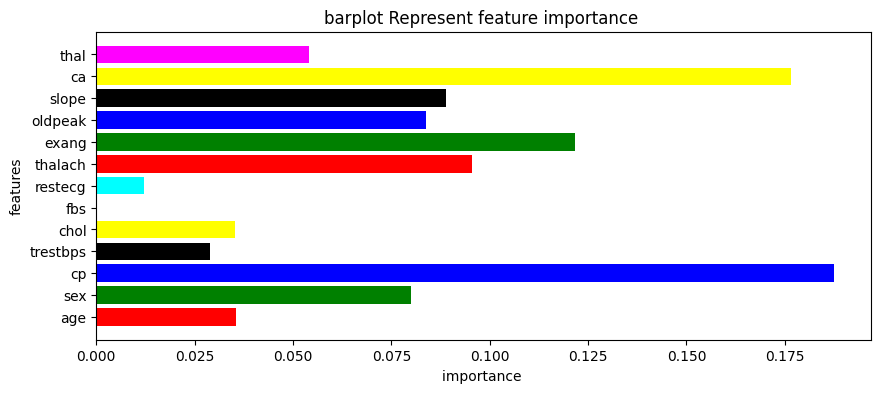

In [ ]:
#creating a barplot to visualize the feature importances from  Extreme Gradient Boosting (XGBoost) model
#It is helpful for understanding which features have the most influence on model's predictions
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})
colors = ['red', 'green', 'blue', 'black', 'yellow', 'magenta', 'cyan']
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'], imp_feature['Importance'], color=colors)
plt.show()

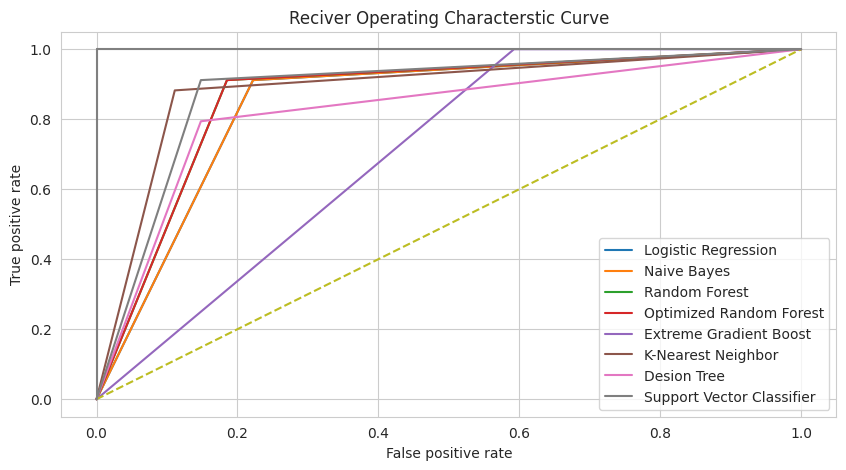

In [ ]:
#Calculating the Receiver Operating Characteristic (ROC) curve values for various classification models and have stored the false positive rates, true positive rates, and thresholds for each model
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)
orf_false_positive_rate,orf_true_positive_rate, orf_threshold = roc_curve(y_test,best_rf_predicted)
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)

#creating a Receiver Operating Characteristic (ROC) curve plot for multiple classification models and displaying it using Matplotlib and Seaborn.
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(orf_false_positive_rate,orf_true_positive_rate, label='Optimized Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

Model Evaluation

In [ ]:
#creating a DataFrame called model_ev to store the accuracy scores of various classification models
#It is helpful summary for comparing the performance of these models.
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Optimized Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,best_rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,85.245902
1,Naive Bayes,85.245902
2,Random Forest,86.885246
3,Optimized Random Forest,86.885246
4,Extreme Gradient Boost,73.770492
5,K-Nearest Neighbour,88.524590
6,Decision Tree,81.967213
7,Support Vector Machine,88.524590


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(model_ev, *['Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(model_ev, *['Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(model_ev, *['Model'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(model_ev, *['Accuracy', 'Model'], **{'inner': 'stick'})
chart

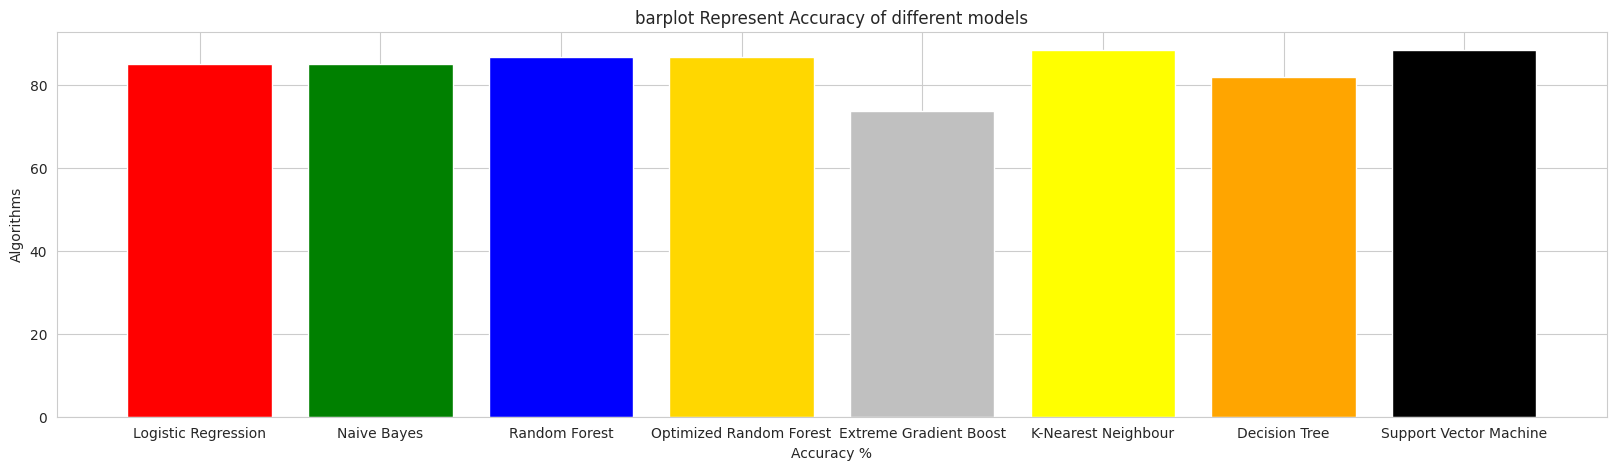

In [ ]:
#creating a horizontal bar plot to visualize and compare the accuracy of different classification models
#It is useful way to quickly assess how well each model performs
colors = ['red','green','blue','gold','silver','yellow','orange','black']
plt.figure(figsize=(20,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

Cross Validation

In [ ]:
# Define a function to perform cross-validation and return mean accuracy
def perform_cross_validation(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    mean_accuracy = scores.mean()
    return mean_accuracy

#Logistic Regression
lr_mean_accuracy = perform_cross_validation(lr, X_train, y_train)
print(f"Mean Cross-Validation Accuracy for Logistic Regression: {lr_mean_accuracy*100:.2f}%")

#Naive Bayes
nb_mean_accuracy = perform_cross_validation(nb, X_train, y_train)
print(f"Mean Cross-Validation Accuracy for Naive Bayes: {nb_mean_accuracy*100:.2f}%")

#Random Forest
rf_mean_accuracy = perform_cross_validation(rf,X_train, y_train)
print(f"Mean Cross-Validation Accuracy for Random Forest:{rf_mean_accuracy*100:.2f}%")

#Optimized Random Forest
best_rf_mean_accuracy = perform_cross_validation(best_rf, X_train, y_train)
print(f"Mean Cross-Validation Accuracy for Optimized Random Forest: {best_rf_mean_accuracy*100:.2f}%")

#Extreme Gradient Boot
xgb_mean_accuracy = perform_cross_validation(xgb,X_train, y_train)
print(f"Mean Cross-Validation Accuracy for Extrem Gradient Boost:{xgb_mean_accuracy*100:.2f}%")

#K-Nearest Neighbour
knn_mean_accuracy = perform_cross_validation(knn,X_train, y_train)
print(f"Mean Cross-Validation Accuracy for K-Nearst Neighbour:{knn_mean_accuracy*100:.2f}%")
#Decision Tree
dt_mean_accuracy = perform_cross_validation(dt,X_train, y_train)
print(f"Mean Cross-Validation Accuracy for Decision Tree:{dt_mean_accuracy*100:.2f}%")

#SUpport Vector
svc_mean_accuracy = perform_cross_validation(svc,X_train, y_train)
print(f"Mean Cross-Validation Accuracy for Support Vector Machine:{svc_mean_accuracy*100:.2f}%")

Mean Cross-Validation Accuracy for Logistic Regression: 81.02%
Mean Cross-Validation Accuracy for Naive Bayes: 81.04%
Mean Cross-Validation Accuracy for Random Forest:81.45%
Mean Cross-Validation Accuracy for Optimized Random Forest: 84.74%
Mean Cross-Validation Accuracy for Extrem Gradient Boost:71.51%
Mean Cross-Validation Accuracy for K-Nearst Neighbour:82.27%
Mean Cross-Validation Accuracy for Decision Tree:76.47%
Mean Cross-Validation Accuracy for Support Vector Machine:79.40%


Ensembling

In [ ]:
#creating a StackingCVClassifier, which is an ensemble learning technique, and evaluating its performance on the test data.
scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[24  3]
 [ 5 29]]


Accuracy of StackingCVClassifier: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



Building Predictive System

In [ ]:
input_data = (41, 0, 1, 130, 204, 0, 0, 172, 0, 1.4, 2, 0, 2)

#Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the nupy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print("The person does not have a Heart Disease")
else:
  print("The person has Heart Disease")

[1]
The person has Heart Disease


#Conclusion
1)  After using Ensembling the accuracy score is 86.88%.

2) Exercise induced angina,Chest pain is major symptoms of heart attack.